In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel
from skimage.feature import greycomatrix, greycoprops
from skimage.measure import shannon_entropy

In [2]:
print(os.listdir(r"D:\SDP GLCM FINAL"))

['TEST', 'TRAIN']


In [3]:
#Start by creating empty lists.
train_images = []
train_labels = [] 

In [4]:
for directory_path in glob.glob(r"D:\SDP GLCM FINAL\TRAIN\*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path,0) #Reading color images
        img = cv2.resize(img, (280, 430)) #Resize images
        #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        train_images.append(img)
        train_labels.append(label)

Classroom
D:\SDP GLCM FINAL\TRAIN\Classroom\00000001.jpg
D:\SDP GLCM FINAL\TRAIN\Classroom\00000002.jpg
D:\SDP GLCM FINAL\TRAIN\Classroom\00000003.jpg
D:\SDP GLCM FINAL\TRAIN\Classroom\00000004.jpg
D:\SDP GLCM FINAL\TRAIN\Classroom\00000005.jpg
D:\SDP GLCM FINAL\TRAIN\Classroom\00000006.jpg
D:\SDP GLCM FINAL\TRAIN\Classroom\00000007.jpg
D:\SDP GLCM FINAL\TRAIN\Classroom\00000008.jpg
D:\SDP GLCM FINAL\TRAIN\Classroom\00000009.jpg
D:\SDP GLCM FINAL\TRAIN\Classroom\00000010.jpg
D:\SDP GLCM FINAL\TRAIN\Classroom\00000011.jpg
D:\SDP GLCM FINAL\TRAIN\Classroom\00000012.jpg
D:\SDP GLCM FINAL\TRAIN\Classroom\00000013.jpg
D:\SDP GLCM FINAL\TRAIN\Classroom\00000014.jpg
D:\SDP GLCM FINAL\TRAIN\Classroom\00000015.jpg
D:\SDP GLCM FINAL\TRAIN\Classroom\00000016.jpg
D:\SDP GLCM FINAL\TRAIN\Classroom\00000017.jpg
D:\SDP GLCM FINAL\TRAIN\Classroom\00000018.jpg
D:\SDP GLCM FINAL\TRAIN\Classroom\00000019.jpg
D:\SDP GLCM FINAL\TRAIN\Classroom\00000020.jpg
D:\SDP GLCM FINAL\TRAIN\Classroom\00000021.jpg
D:\

In [5]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [6]:
print(train_images)
print(train_labels)

[[[ 94  94  95 ...  94  93  92]
  [ 93  94  94 ...  94  93  92]
  [ 92  93  93 ...  94  93  93]
  ...
  [ 25  22  23 ...  45  46  48]
  [ 24  23  24 ...  43  44  45]
  [ 24  23  24 ...  42  42  43]]

 [[ 82  85  91 ...  74  68  65]
  [ 82  86  91 ...  78  72  68]
  [ 83  86  92 ...  82  77  74]
  ...
  [ 48  48  49 ...  29  29  29]
  [ 49  48  47 ...  28  28  27]
  [ 50  47  46 ...  28  27  26]]

 [[237 237 238 ... 175 177 179]
  [237 237 238 ... 174 176 177]
  [237 237 238 ... 172 173 173]
  ...
  [ 38  39  39 ...   6   4   3]
  [ 40  40  40 ...   8   4   2]
  [ 41  41  40 ...   9   4   2]]

 ...

 [[248 239 240 ... 249 238 255]
  [244 241 244 ... 243 227 244]
  [237 243 250 ... 233 211 228]
  ...
  [227 205 186 ... 248 249 255]
  [244 225 212 ... 252 252 251]
  [255 239 229 ... 255 254 248]]

 [[ 36  81  89 ...  87  81 127]
  [ 39  73  81 ...  85  93 153]
  [ 44  61  68 ...  80 112 193]
  ...
  [ 36  36  36 ...   4  13  55]
  [ 55  54  53 ...  29  37  76]
  [ 67  66  65 ...  46  52  

In [7]:
#Do exactly the same for test/validation images
# test
test_images = []
test_labels = []

In [8]:
for directory_path in glob.glob(r"D:\SDP GLCM FINAL\TEST\*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path,0)
        img = cv2.resize(img, (280, 430))
        test_images.append(img)
        test_labels.append(fruit_label)

## Creating NumPy array

In [9]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [10]:
print(test_images)
print(test_labels)

[[[ 94  94  94 ... 106 105 105]
  [ 94  94  94 ... 106 105 105]
  [ 94  94  94 ... 106 106 105]
  ...
  [119  67  41 ...  31  33  35]
  [124  67  40 ...  31  33  35]
  [127  67  40 ...  31  33  35]]

 [[ 84  87  88 ...  67  49  37]
  [ 85  89  92 ...  76  52  36]
  [ 88  92  97 ...  90  57  35]
  ...
  [ 17  22  28 ...  13  12  10]
  [ 22  25  29 ...  13  12  10]
  [ 25  28  29 ...  13  12  10]]

 [[162 162 163 ... 136 135 135]
  [162 162 163 ... 136 136 135]
  [162 162 163 ... 137 137 136]
  ...
  [ 73  75  77 ...  91  89  88]
  [ 73  75  77 ...  90  88  87]
  [ 73  75  77 ...  90  88  87]]

 ...

 [[234 234 234 ...  20  28  58]
  [234 234 234 ...  23  30  54]
  [234 234 234 ...  27  32  48]
  ...
  [236 236 237 ... 232 229 226]
  [235 235 236 ... 236 233 231]
  [235 235 236 ... 238 237 234]]

 [[205 205 205 ... 222 221 220]
  [205 205 205 ... 221 220 220]
  [205 205 206 ... 221 220 220]
  ...
  [186 186 188 ...  59  31  42]
  [189 189 192 ...  54  26  37]
  [191 192 195 ...  51  22  

## Encode labels from folder name to integer

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [12]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
#If you only have one dataset then split here
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

## Grey-level Co-occurence Matrix

In [13]:
def feature_extractor(dataset):
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):  #iterate through each file 
       # print(image)
        #break
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        
        img = dataset[image,:,:]
    ################################################################
    #START ADDING DATA TO THE DATAFRAME
  
                

        GLCM = greycomatrix(img, [1], [0])       
        GLCM_Energy = greycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_corr = greycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr       
        GLCM_diss = greycoprops(GLCM, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss       
        GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom       
        GLCM_contr = greycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr
        
        GLCM2 = greycomatrix(img, [1], [np.pi/2])       
        GLCM_Energy2 = greycoprops(GLCM2, 'energy')[0]
        df['Energy2'] = GLCM_Energy2
        GLCM_corr2 = greycoprops(GLCM2, 'correlation')[0]
        df['Corr2'] = GLCM_corr2       
        GLCM_diss2 = greycoprops(GLCM2, 'dissimilarity')[0]
        df['Diss_sim2'] = GLCM_diss2       
        GLCM_hom2 = greycoprops(GLCM2, 'homogeneity')[0]
        df['Homogen2'] = GLCM_hom2       
        GLCM_contr2 = greycoprops(GLCM2, 'contrast')[0]
        df['Contrast2'] = GLCM_contr2
        
        GLCM3 = greycomatrix(img, [1], [np.pi/4])       
        GLCM_Energy3 = greycoprops(GLCM3, 'energy')[0]
        df['Energy3'] = GLCM_Energy3
        GLCM_corr3 = greycoprops(GLCM3, 'correlation')[0]
        df['Corr3'] = GLCM_corr3       
        GLCM_diss3 = greycoprops(GLCM3, 'dissimilarity')[0]
        df['Diss_sim3'] = GLCM_diss3       
        GLCM_hom3 = greycoprops(GLCM3, 'homogeneity')[0]
        df['Homogen3'] = GLCM_hom3       
        GLCM_contr3 = greycoprops(GLCM3, 'contrast')[0]
        df['Contrast3'] = GLCM_contr3
        
        GLCM4 = greycomatrix(img, [1], [3*np.pi/4])       
        GLCM_Energy4 = greycoprops(GLCM4, 'energy')[0]
        df['Energy4'] = GLCM_Energy4
        GLCM_corr4 = greycoprops(GLCM4, 'correlation')[0]
        df['Corr4'] = GLCM_corr4       
        GLCM_diss4 = greycoprops(GLCM4, 'dissimilarity')[0]
        df['Diss_sim4'] = GLCM_diss4       
        GLCM_hom4 = greycoprops(GLCM4, 'homogeneity')[0]
        df['Homogen4'] = GLCM_hom4       
        GLCM_contr4 = greycoprops(GLCM4, 'contrast')[0]
        df['Contrast4'] = GLCM_contr4
        
        GLCM5 = greycomatrix(img, [3], [0])       
        GLCM_Energy5 = greycoprops(GLCM5, 'energy')[0]
        df['Energy5'] = GLCM_Energy5
        GLCM_corr5 = greycoprops(GLCM5, 'correlation')[0]
        df['Corr5'] = GLCM_corr5       
        GLCM_diss5 = greycoprops(GLCM5, 'dissimilarity')[0]
        df['Diss_sim5'] = GLCM_diss5       
        GLCM_hom5 = greycoprops(GLCM5, 'homogeneity')[0]
        df['Homogen5'] = GLCM_hom5       
        GLCM_contr5 = greycoprops(GLCM5, 'contrast')[0]
        df['Contrast5'] = GLCM_contr5
        
        GLCM6 = greycomatrix(img, [3], [np.pi/2])       
        GLCM_Energy6 = greycoprops(GLCM6, 'energy')[0]
        df['Energy6'] = GLCM_Energy6
        GLCM_corr6 = greycoprops(GLCM6, 'correlation')[0]
        df['Corr6'] = GLCM_corr6       
        GLCM_diss6 = greycoprops(GLCM6, 'dissimilarity')[0]
        df['Diss_sim6'] = GLCM_diss6       
        GLCM_hom6 = greycoprops(GLCM6, 'homogeneity')[0]
        df['Homogen6'] = GLCM_hom6       
        GLCM_contr6 = greycoprops(GLCM6, 'contrast')[0]
        df['Contrast6'] = GLCM_contr6
        
        GLCM7 = greycomatrix(img, [3], [np.pi/4])       
        GLCM_Energy7 = greycoprops(GLCM7, 'energy')[0]
        df['Energy7'] = GLCM_Energy7
        GLCM_corr7 = greycoprops(GLCM7, 'correlation')[0]
        df['Corr7'] = GLCM_corr7       
        GLCM_diss7 = greycoprops(GLCM7, 'dissimilarity')[0]
        df['Diss_sim7'] = GLCM_diss7       
        GLCM_hom7 = greycoprops(GLCM7, 'homogeneity')[0]
        df['Homogen7'] = GLCM_hom7       
        GLCM_contr7 = greycoprops(GLCM7, 'contrast')[0]
        df['Contrast7'] = GLCM_contr7
        
        GLCM8 = greycomatrix(img, [3], [3*np.pi/4])       
        GLCM_Energy8 = greycoprops(GLCM8, 'energy')[0]
        df['Energy8'] = GLCM_Energy8
        GLCM_corr8 = greycoprops(GLCM8, 'correlation')[0]
        df['Corr8'] = GLCM_corr8       
        GLCM_diss8 = greycoprops(GLCM8, 'dissimilarity')[0]
        df['Diss_sim8'] = GLCM_diss8       
        GLCM_hom8 = greycoprops(GLCM8, 'homogeneity')[0]
        df['Homogen8'] = GLCM_hom8       
        GLCM_contr8 = greycoprops(GLCM8, 'contrast')[0]
        df['Contrast8'] = GLCM_contr8
        
        GLCM9 = greycomatrix(img, [5], [0])       
        GLCM_Energy9 = greycoprops(GLCM9, 'energy')[0]
        df['Energy9'] = GLCM_Energy9
        GLCM_corr9 = greycoprops(GLCM9, 'correlation')[0]
        df['Corr9'] = GLCM_corr9       
        GLCM_diss9 = greycoprops(GLCM9, 'dissimilarity')[0]
        df['Diss_sim9'] = GLCM_diss9       
        GLCM_hom9 = greycoprops(GLCM9, 'homogeneity')[0]
        df['Homogen9'] = GLCM_hom9       
        GLCM_contr9 = greycoprops(GLCM9, 'contrast')[0]
        df['Contrast9'] = GLCM_contr9
        
        GLCM10 = greycomatrix(img, [5], [np.pi/2])       
        GLCM_Energy10 = greycoprops(GLCM10, 'energy')[0]
        df['Energy10'] = GLCM_Energy10
        GLCM_corr10 = greycoprops(GLCM10, 'correlation')[0]
        df['Corr10'] = GLCM_corr10       
        GLCM_diss10 = greycoprops(GLCM10, 'dissimilarity')[0]
        df['Diss_sim10'] = GLCM_diss10       
        GLCM_hom10 = greycoprops(GLCM10, 'homogeneity')[0]
        df['Homogen10'] = GLCM_hom10       
        GLCM_contr10 = greycoprops(GLCM10, 'contrast')[0]
        df['Contrast10'] = GLCM_contr10
        
        GLCM11 = greycomatrix(img, [5], [np.pi/4])       
        GLCM_Energy11 = greycoprops(GLCM11, 'energy')[0]
        df['Energy11'] = GLCM_Energy11
        GLCM_corr11 = greycoprops(GLCM11, 'correlation')[0]
        df['Corr11'] = GLCM_corr11       
        GLCM_diss11 = greycoprops(GLCM11, 'dissimilarity')[0]
        df['Diss_sim11'] = GLCM_diss11       
        GLCM_hom11 = greycoprops(GLCM11, 'homogeneity')[0]
        df['Homogen11'] = GLCM_hom11       
        GLCM_contr11 = greycoprops(GLCM11, 'contrast')[0]
        df['Contrast11'] = GLCM_contr11
        
        GLCM12 = greycomatrix(img, [5], [3*np.pi/4])       
        GLCM_Energy12 = greycoprops(GLCM12, 'energy')[0]
        df['Energy12'] = GLCM_Energy12
        GLCM_corr12 = greycoprops(GLCM12, 'correlation')[0]
        df['Corr12'] = GLCM_corr12       
        GLCM_diss12 = greycoprops(GLCM12, 'dissimilarity')[0]
        df['Diss_sim12'] = GLCM_diss12       
        GLCM_hom12 = greycoprops(GLCM12, 'homogeneity')[0]
        df['Homogen12'] = GLCM_hom12       
        GLCM_contr12 = greycoprops(GLCM12, 'contrast')[0]
        df['Contrast12'] = GLCM_contr12
       
    #Add more filters as needed
        entropy = shannon_entropy(img)
        df['Entropy'] = entropy

        
        #Append features from current image to the dataset
        image_dataset = image_dataset.append(df)
        
    return image_dataset

In [14]:
image_features = feature_extractor(x_train)
X_for_ML =image_features

In [15]:
print(X_for_ML)

      Energy      Corr   Diss_sim   Homogen    Contrast   Energy2     Corr2  \
0   0.039179  0.993111   2.688022  0.531294   39.708644  0.042843  0.994327   
0   0.023037  0.966994   9.033133  0.278807  262.829749  0.027673  0.988435   
0   0.036162  0.979263   8.089731  0.347584  302.938376  0.042286  0.992814   
0   0.012480  0.947748  11.582954  0.171418  387.735409  0.017054  0.984692   
0   0.038608  0.978944   4.003092  0.505672   92.839552  0.041688  0.983843   
..       ...       ...        ...       ...         ...       ...       ...   
0   0.016437  0.881023  11.632241  0.127531  312.713012  0.021352  0.963124   
0   0.016191  0.968178   9.314112  0.171417  236.572143  0.020238  0.989770   
0   0.020800  0.961900  10.160707  0.234888  395.118130  0.019692  0.984259   
0   0.013210  0.941213  14.129816  0.120158  461.495691  0.013952  0.957585   
0   0.033651  0.962543  10.337551  0.312911  396.742852  0.038295  0.990613   

    Diss_sim2  Homogen2   Contrast2  ...    Corr11 

## Light Gradient Boosting Machine

In [16]:
import lightgbm as lgb
 #Class names for LGBM start at 0 so reassigning labels from 1,2 to 0,1
d_train = lgb.Dataset(X_for_ML, label=y_train)

In [17]:
lgbm_params = {'learning_rate':0.05, 'boosting_type':'dart',    
              'objective':'multiclass',
              'metric': 'multi_logloss',
               'num_leaves':100,
              'max_depth':10,
              'num_class':2}  #no.of unique values in the target class not inclusive of the end value

In [18]:
print(lgbm_params)

{'learning_rate': 0.05, 'boosting_type': 'dart', 'objective': 'multiclass', 'metric': 'multi_logloss', 'num_leaves': 100, 'max_depth': 10, 'num_class': 2}


In [19]:
lgb_model = lgb.train(lgbm_params, d_train, 100) #50 iterations. Increase iterations for small learning rates

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004521 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15555
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 61
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Info] Start training from score -0.693147


In [20]:
#Predict on Test data
#Extract features from test data and reshape, just like training data
test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

#Predict on test
test_prediction = lgb_model.predict(test_for_RF)
test_prediction=np.argmax(test_prediction, axis=1)
#Inverse le transform to get original label back. 
test_prediction = le.inverse_transform(test_prediction)

In [21]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))

Accuracy =  0.952


<AxesSubplot:>

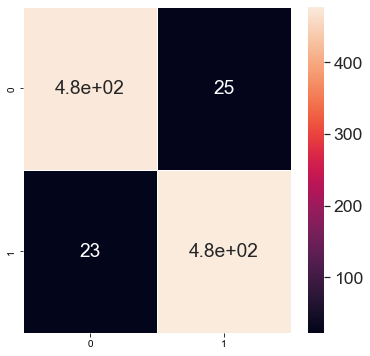

In [22]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_prediction)

fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

## Importing Random Image

The prediction for this image is:  ['Classroom']
The actual label for this image is:  Classroom


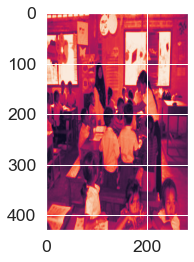

In [29]:
import random
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)

#Extract features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = lgb_model.predict(input_img_for_RF)
img_prediction=np.argmax(img_prediction, axis=1)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(test_labels, test_prediction))

              precision    recall  f1-score   support

   Classroom       0.95      0.95      0.95       500
 Picnic_area       0.95      0.95      0.95       500

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000

